# 02807 - Week 2 Exercises


## Learning objectives:

* Run Python code in Colab or Jupyter notebooks
* Get hands-on experience storing, manipulating and extracting data efficiently with NumPy.
* Perform optimised computations on arrays using NumPy’s vectorised functions. 
* Compare the performance of simple non-vectorised operations to vectorised one. 


## Readings:

### **Numpy**:

Main reading:

* [Chapter 2: Introduction to Numpy](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html). Python Data Science Handbook.

Supplementary readings:

* [A Visual Intro to NumPy and Data Representation](https://jalammar.github.io/visual-numpy/)
* [Guide to NumPy resources: beginner, intermediate and advanced](https://e2eml.school/numpy_resources.html)



## Exercise 1: importing NumPy

### **1. Import numpy as np and print the version number**


In [2]:
print("Solution")
import numpy as np

Solution


## Exercise 2: creating arrays

### a. Create a 1D array of numbers from 0 to 9

Desired output: 
```
Solution
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
```

In [5]:
print("Solution")
arr = np.linspace(0, 9, 10, dtype=np.int8)
print(arr)

Solution
[0 1 2 3 4 5 6 7 8 9]


### b. Create a 3×3 Boolean array of all `True`’s

Desired output: 

```
array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])
```

In [7]:
print("Solution")
arr = np.ones((3, 3), dtype=bool)
print(arr)

Solution
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


### c. Create a 5 x 3 x 4 array randomly filled with integers between 0 and 4, inclusive:

hint: ``np.random.randint``

Example of desired output:

```
array([[[3, 4, 0, 4],
        [2, 3, 4, 4],
        [0, 2, 4, 2]],

       [[2, 1, 3, 0],
        [4, 3, 2, 2],
        [2, 1, 2, 4]],

       [[3, 1, 1, 1],
        [4, 4, 0, 1],
        [0, 2, 3, 0]],

       [[3, 0, 3, 3],
        [4, 0, 3, 3],
        [3, 3, 0, 1]],

       [[3, 2, 2, 2],
        [0, 1, 1, 4],
        [4, 2, 1, 0]]])

```

In [11]:
print("Solution")
arr = np.random.randint(0, 4, size=(5, 3, 4))
print(arr)

Solution
[[[0 3 1 0]
  [1 2 1 2]
  [2 1 0 1]]

 [[3 1 1 0]
  [2 2 2 2]
  [2 2 1 2]]

 [[3 0 2 2]
  [0 2 3 2]
  [2 3 1 3]]

 [[2 2 0 3]
  [0 0 1 3]
  [3 3 3 1]]

 [[2 1 3 3]
  [2 2 1 0]
  [1 3 1 3]]]


## Exercise 3: universal functions and vectorisation (part 1). Faster dot product.

The dot product is an algebraic operation which takes two equal-sized vectors and returns a single scalar. For two vectors $\mathbf{x}$ and $\mathbf{y}$, their dot product is defined as:

$$\mathbf{x} \cdot \mathbf{y} = \sum_{i=1}^{n}x_iy_i = x_1y_1 + x_2y_2 + … + x_ny_n$$

Let's consider the following vectors.

In [15]:
X = np.random.rand(100000)
Y = np.random.rand(100000)

In Python, one way to calulate the dot product is to iterate over the number of elements in the vectors, multiplying their $i$-th elements, and accumulating the result:

In [12]:
def dot_slow_1(x,y):
    """"Dot product by looping over elements and multiplying them"""
    s = 0 
    for i in range(x.size):
        s += x[i] * y[i]
    return s

A more succinct and pythonic way to do this would be to use list comprehension:

In [13]:
def dot_slow_2(x, y):
    """Dot product as sum of list comprehension doing element-wise multiplication"""
    return sum(x_i * y_i for x_i, y_i in zip(x, y))

Let's look at the performance we get computing dot products in this way.

In [16]:
print("Time and memory use of dot_slow_1:")
%timeit dot_slow_1(X, Y)

print("Time and memory use of dot_slow_2:")
%timeit dot_slow_2(X, Y)

Time and memory use of dot_slow_1:
17.3 ms ± 316 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Time and memory use of dot_slow_2:
15 ms ± 303 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Use NumPy's vectorised operations to define a function that computes the dot product.

In [17]:
def my_dot(x, y):
  return np.dot(x, y)
  raise NotImplementedError

Use `%timeit` to check the performance of your function. How much faster did we get with vectorisation? If you did things right, your solution should run in *µs*, running around 1000x faster per loop than the non-vectorised `dot_slow` functions.

In [18]:
print("Time and memory use of my_dot:")
%timeit my_dot(X, Y)

Time and memory use of my_dot:
184 µs ± 1.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Exercise 4: universal functions and vectorisation (part 2). Buying low, selling high.

Let's look at a more interesting problem. Here's a classic technical interview problem:

> Given a stock’s price history as a sequence, and assuming that you are only allowed to make one purchase and one sale, what is the maximum profit that can be obtained? For example, given prices = (20, 18, 14, 17, 20, 21, 15), the max profit would be 7, from buying at 14 and selling at 21.



The straighforward solution, with $O(n^2)$ [time complexity](https://www.hackerearth.com/practice/basic-programming/complexity-analysis/time-and-space-complexity/tutorial/), consists of taking every combination of two consecutive prices and determining the maximum difference.

However, there's also an $O(n)$ solution that consists of iterating through the sequence just once and finding the difference between each price and a running minimum. Here's an non-vectorised implementation:


In [19]:
def profit(prices):
    max_price = 0
    min_price = prices[0]
    for price in prices[1:]:
        min_price = min(min_price, price)
        max_price = max(price - min_price, max_price)
    return max_price

prices = (20, 18, 14, 17, 20, 21, 15)
profit(prices)

7

Can this be done faster in NumPy? Certainly. But first, let’s create a more realistic example (using, of course, some trusty NumPy functions!):

In [20]:
import numpy as np
# Set seed for randn below
np.random.seed(2)

# Create mostly NaN array with a few 'turning points' (local min/max).
prices = np.full(100, fill_value=np.nan)
prices[[0, 10, 50, 80, -1]] = [80., 30., 50., 70., 40.]

# Linearly interpolate the missing values and add some noise.
x = np.arange(len(prices))
is_valid = ~np.isnan(prices)
prices = np.interp(x=x, xp=x[is_valid], fp=prices[is_valid])
prices += np.random.randn(len(prices)) * 2

In [21]:
print(prices)

[79.16648431 74.88746635 65.72760781 68.28054162 56.41312883 53.31650527
 51.00576283 42.50942383 37.88409556 33.18198477 31.10290809 35.08441603
 31.08307879 29.26414911 33.07811664 31.3076806  32.96173901 35.85000244
 32.5042581  34.5180505  33.24378421 35.18713166 36.5131409  34.5224419
 36.32235607 37.02763194 36.72468998 36.12477543 36.15756555 39.19300961
 39.46188608 44.96273358 36.13046485 41.72545301 42.74088907 45.21926773
 44.00371441 41.81157259 44.00001952 45.58470514 44.37298361 47.04202348
 42.26381869 49.96236933 49.93535602 46.82864532 49.22268156 48.59594118
 47.34172942 49.67542044 52.00073177 49.90448163 50.58199449 51.85105847
 53.53365933 55.89009179 52.73064139 55.68345915 55.76556535 52.28277523
 55.8280337  57.06867554 57.92085952 59.31867353 55.25268724 60.09251105
 59.31131551 58.45445528 63.04859286 64.13722582 62.0268328  65.68491256
 63.9036337  65.46631135 63.80252211 69.83564078 62.01443442 67.81709475
 70.05690588 65.26640024 69.62106147 68.2666153  68.

Let's look at the data with `matplotlib`. Don't worry if you don't get what goes on here. We'll learn how to use `matplotlib` for data visualisation in the coming weeks.

The idea is to buy low (green) and sell high (red):

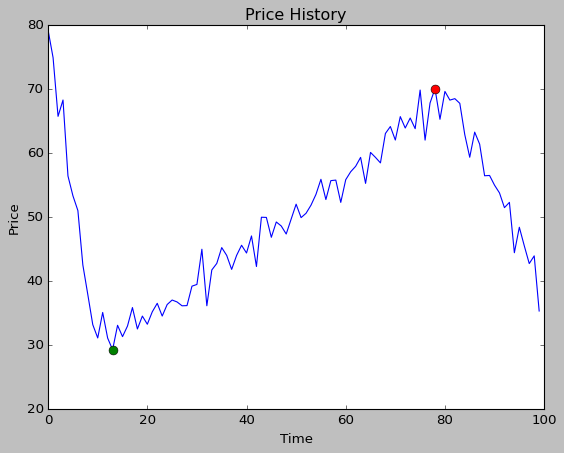

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

# Warning! This isn't a fully correct solution, but it works for now.
# If the absolute min came after the absolute max, you'd have trouble.
mn = np.argmin(prices)
mx = mn + np.argmax(prices[mn:])
kwargs = {'markersize': 8, 'linestyle': ''}

fig, ax = plt.subplots()
ax.plot(prices)
ax.set_title('Price History')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.plot(mn, prices[mn], marker='o', color='g', **kwargs)
ax.plot(mx, prices[mx], marker='o', color='r', **kwargs)
plt.show()

What does a NumPy implementation look like? There is no `np.runmin()` that computes the running (or cumulative) minimum. However, NumPy’s universal functions (`ufunc`'s) all have an `accumulate()` method that does what its name implies:



In [24]:
x = np.array([10,2,4,7,9,1,11,3])
runmin = np.minimum.accumulate
runmin(x)

array([10,  2,  2,  2,  2,  1,  1,  1], dtype=int32)

Use `runmin` and other NumPy functions to define your own version of the `profit` function. Keeping the logic from the pure-Python example, you can find the difference between each price and a running minimum (element-wise), and then take the max of this sequence:

In [28]:
def my_profit(prices):
     """Price minus cumulative minimum price, element-wise."""
     nmin = np.min(np.minimum.accumulate(prices))
     nmax = np.max(np.maximum.accumulate(prices))
     return nmax - nmin
     raise NotImplementedError

Let's see the time performance of the original `profit` function on our dataset.

In [26]:
print("The maximum profit is", profit(prices))
%timeit profit(prices)

The maximum profit is 40.79275676698767
21.6 µs ± 122 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


How does `my_profit` compare? Your NumPy solution should do at least as well as the pure-Python solution over this small dataset (we're working with 100 data points). 

In [29]:
print("The maximum profit is", my_profit(prices))
%timeit my_profit(prices)

The maximum profit is 49.90233519541609
5.47 µs ± 152 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)




Over a large dataset, you'll normally see significant performance differences. Our implementation of `my_profit` typically runs about 50x faster than `profit` over a random dataset with 1.000.000 datapoints. Do you get comparable results?

In [30]:
rand_seq = np.random.randint(0, 100, size=1000000)
%timeit profit(rand_seq)
%timeit my_profit(rand_seq)

186 ms ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.76 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Exercise 5: extracting information from arrays

Let's extract some potentially useful information from our `prices` dataset.


### a. Let's find all values in a given range. Extract all prices with values between 45 and 65 from the first 10 prices in `prices`.


In [ ]:
print("First 10 prices")
prices_small = prices[:10]
prices_small

In [37]:
print("Solution")
idx = np.where((prices >=45) & (prices <= 65))
prices_rng = prices[idx]
print(prices_rng)

Solution
[56.41312883 53.31650527 51.00576283 45.21926773 45.58470514 47.04202348
 49.96236933 49.93535602 46.82864532 49.22268156 48.59594118 47.34172942
 49.67542044 52.00073177 49.90448163 50.58199449 51.85105847 53.53365933
 55.89009179 52.73064139 55.68345915 55.76556535 52.28277523 55.8280337
 57.06867554 57.92085952 59.31867353 55.25268724 60.09251105 59.31131551
 58.45445528 63.04859286 64.13722582 62.0268328  63.9036337  63.80252211
 62.01443442 62.87642599 59.33622582 63.26078664 61.38313969 56.44441036
 56.49125067 54.97425878 53.76412983 51.46104754 52.28707669 48.39743738
 45.49778605]


### b. Let's say that you want to buy in the first time the price drops below 30. Let's find the first occurence of a value meeting a condition. 

Hint: use `np.argwhere`.

In [40]:
# Solution
print("Solution")
first = np.where(prices < 30)[0]
print(first)

Solution
[13]


### c. Let's get the *positions* and *values* of the top 5 prices overall. Use NumPy only to extract this information.

Hint: Use `np.argwhere` along with `np.percentile`, or sort and slice arrays

In [44]:
# Solution
print("Positions of the top 5 prices")  
idx = np.argpartition(-prices, 5)

print("Values of the top 5 prices")
max_prices = prices[idx[:5]]
print(max_prices)

Positions of the top 5 prices
Values of the top 5 prices
[79.16648431 74.88746635 70.05690588 69.83564078 69.62106147]


### d. Let's get some summary statistics. Print the mean, median and standard deviation of the list of prices.

The desired output is:

```
Mean, median and standard deviation: 50.770589574397285 50.45810666998631 12.125291517615116
```

In [46]:
# Solution
print(np.mean(prices))
print(np.median(prices))
print(np.std(prices))

50.3425177322348
50.27218190956815
11.948370999142766


### e. Finally, let's find all the local maxima in the `prices` array. 

If you are up for the challenge, you can try to use NumPy functions only. Consider first how to achieve a boolean mask reflecting which `prices` are greater than the previous occurences. Then greater than the proceeding occurences. Using these two masks, it is possible to obtain the indices 

Otherwise, the package `scipy.signal` offers a nice function called `find_peaks`.

In [51]:
# Solution


Here are the maxima found with `scipy`.

In [52]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(prices, height=0)

If you store the local maxima in a variable called `peaks`, the following plot will mark them in green.

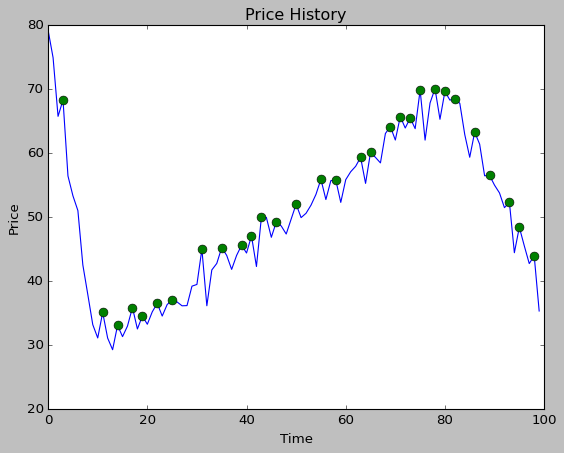

In [53]:
kwargs = {'markersize': 8, 'linestyle': ''}

fig, ax = plt.subplots()
ax.plot(prices)
ax.set_title('Price History')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.plot(peaks, prices[peaks], marker='o', color='g', **kwargs)
plt.show()